In [2]:
# Importing and naming packages/libraries to be used
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
%matplotlib inline

# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/medical_clean.csv")

In [3]:
# Data Exploration / Cleaning / Wrangling  / Transformation

In [4]:
# Dimension of dataframe
df.shape

(10000, 50)

In [5]:
# All column names
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

array([[<Axes: title={'center': 'CaseOrder'}>,
        <Axes: title={'center': 'Zip'}>, <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Lng'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'VitD_levels'}>,
        <Axes: title={'center': 'Doc_visits'}>],
       [<Axes: title={'center': 'Full_meals_eaten'}>,
        <Axes: title={'center': 'vitD_supp'}>,
        <Axes: title={'center': 'Initial_days'}>,
        <Axes: title={'center': 'TotalCharge'}>,
        <Axes: title={'center': 'Additional_charges'}>],
       [<Axes: title={'center': 'Item1'}>,
        <Axes: title={'center': 'Item2'}>,
        <Axes: title={'center': 'Item3'}>,
        <Axes: title={'center': 'Item4'}>,
        <Axes: title={'center': 'Item5'}>],
       [<Axes: title={'center': 'Item6'}>,
        <Axes: title={'center': 'Item7'}>,
 

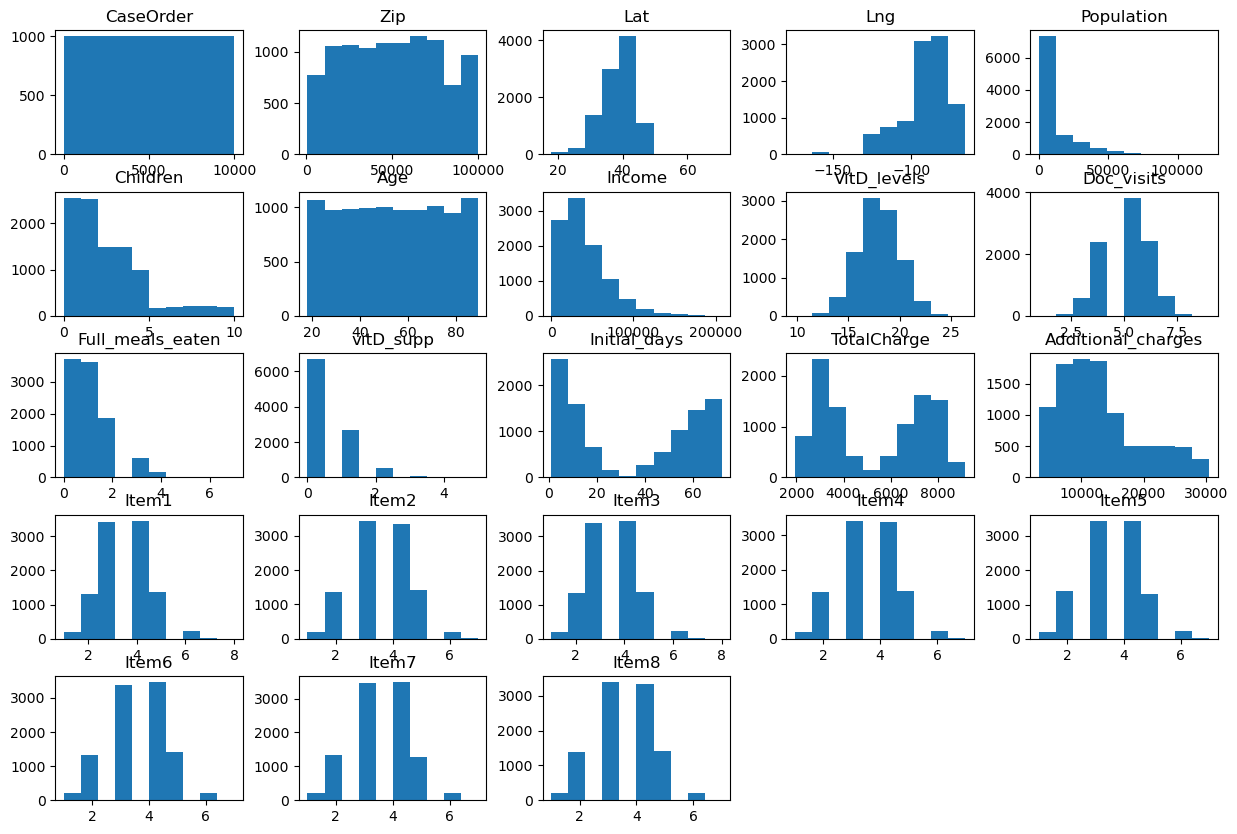

In [7]:
# Histograms of dataframe
df.hist(grid=False, figsize=(15,10), layout=[5,5])

In [8]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [9]:
# Checking for missing data
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

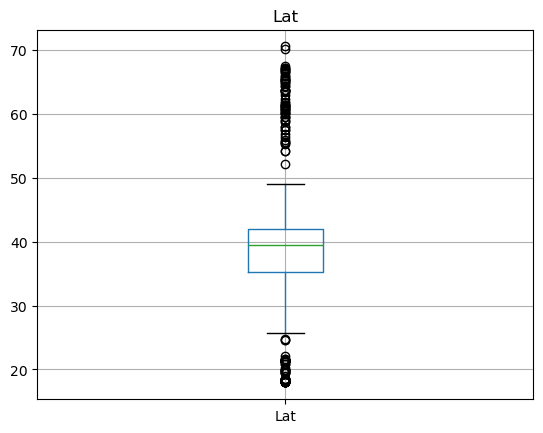

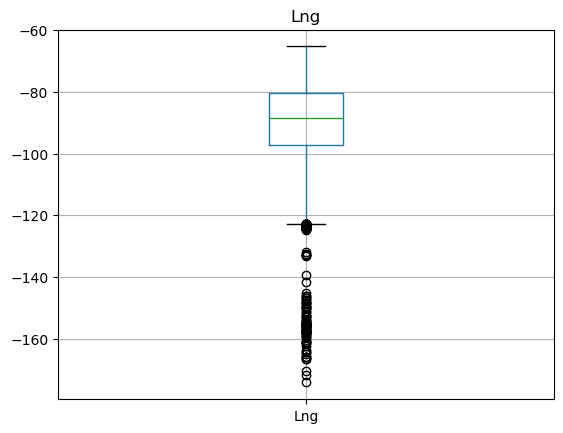

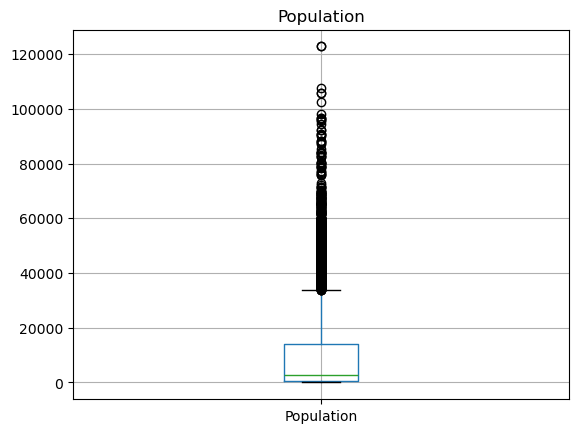

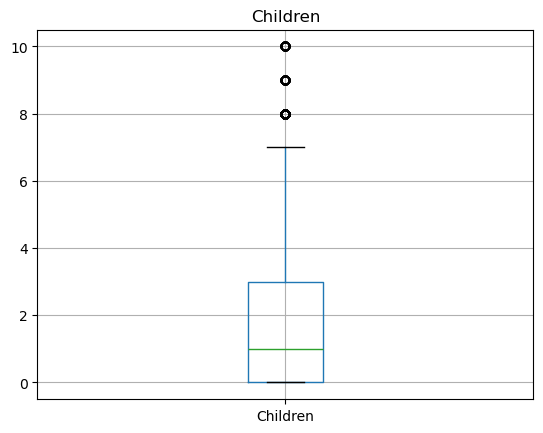

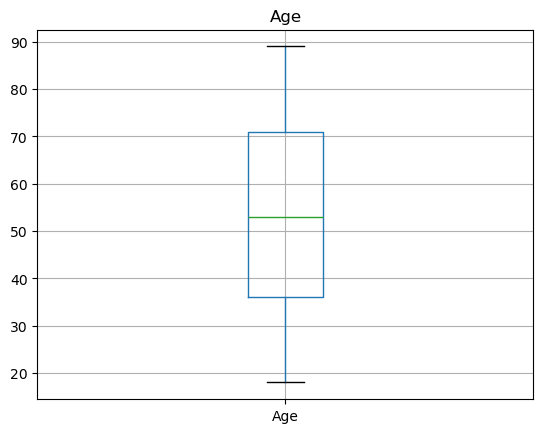

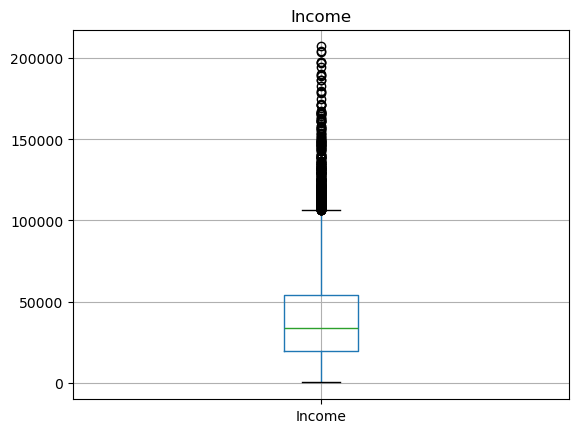

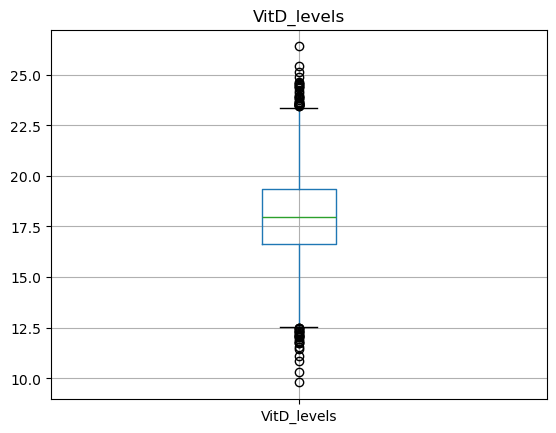

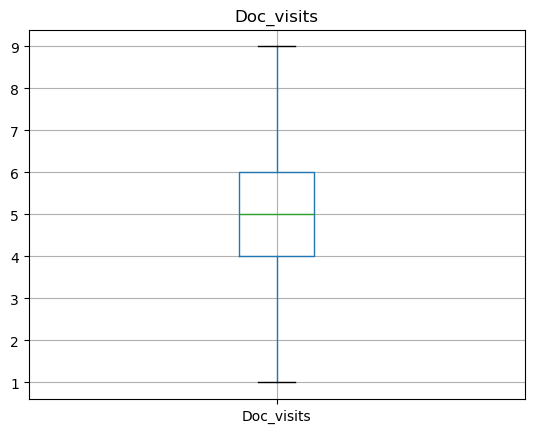

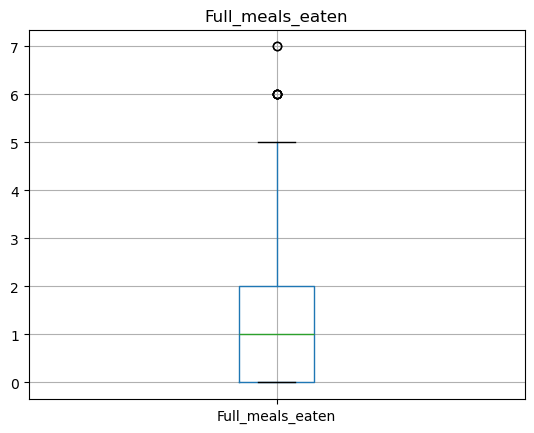

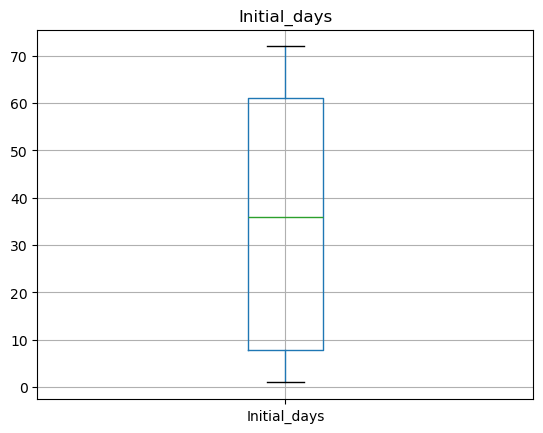

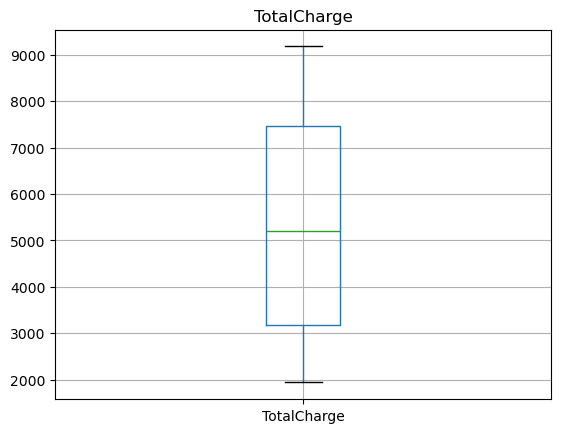

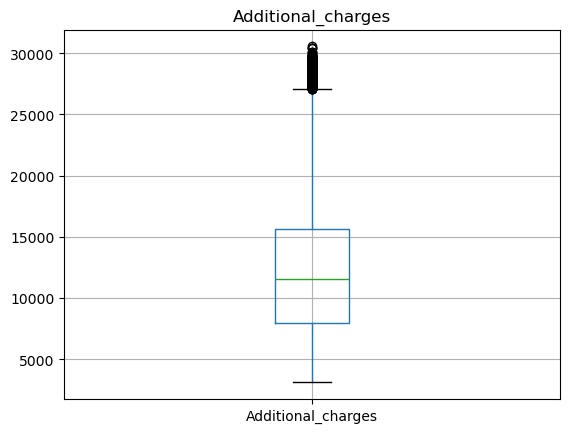

In [10]:
# Checking for outliers in quantitative variables

quant_columns = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']


for column in df:
    if column in quant_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

In [11]:
# Describe / Value_counts for all variables

In [12]:
# Area
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [13]:
# Children
df.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [14]:
# Age
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [15]:
# Income
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [16]:
# Marital
df.Marital.value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [17]:
# Gender
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [18]:
# ReAdmis
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [19]:
# VitD_levels
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [20]:
# Doc_visits
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [21]:
# Full_meals_eaten
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [22]:
# vitD_supp
df.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

In [23]:
# Soft_drink
df.Soft_drink.describe()

count     10000
unique        2
top          No
freq       7425
Name: Soft_drink, dtype: object

In [24]:
# Initial_admin
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [25]:
# HighBlood
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [26]:
# Stroke
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [27]:
# Overweight
df.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [28]:
# Arthritis
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [29]:
# Diabetes
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [30]:
# Hyperlipidemia
df.Hyperlipidemia.value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [31]:
# BackPain
df.BackPain.value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [32]:
# Anxiety
df.Anxiety.value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [33]:
# Allergic_rhinitis
df.Allergic_rhinitis.value_counts()

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [34]:
# Reflux_esophagitis
df.Reflux_esophagitis.value_counts()

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [35]:
# Asthma
df.Asthma.value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [36]:
# Services
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [37]:
# Initial_days
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [38]:
# TotalCharge
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [39]:
# Additional_charges
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [40]:
# Item1
df.Item1.describe()

count    10000.000000
mean         3.518800
std          1.031966
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Item1, dtype: float64

In [41]:
# Item2
df.Item2.describe()

count    10000.000000
mean         3.506700
std          1.034825
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64

In [42]:
# Item3
df.Item3.describe()

count    10000.000000
mean         3.511100
std          1.032755
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Item3, dtype: float64

In [43]:
# Item4
df.Item4.describe()

count    10000.000000
mean         3.515100
std          1.036282
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item4, dtype: float64

In [44]:
# Item5
df.Item5.describe()

count    10000.000000
mean         3.496900
std          1.030192
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item5, dtype: float64

In [45]:
# Item6
df.Item6.describe()

count    10000.000000
mean         3.522500
std          1.032376
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item6, dtype: float64

In [46]:
# Item7
df.Item7.describe()

count    10000.000000
mean         3.494000
std          1.021405
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item7, dtype: float64

In [47]:
# Item8
df.Item8.describe()

count    10000.000000
mean         3.509700
std          1.042312
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item8, dtype: float64

In [48]:
# Variables to keep
# Area, Children, Age, Income, Marital, Gender, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days

In [49]:
# Data Transformation

In [50]:
# Round Initial_days
df['Initial_days'] = df.Initial_days.round(1)

In [51]:
# Remove outliers (> {Mean + 2*std})

In [52]:
# Children outliers
df['Children'] = np.where(df['Children'] > 5, np.nan, df['Children'])
df['Children'].fillna(df['Children'].median(), inplace=True)

In [53]:
# Setting Income outliers to NAs
df['Income'] = np.where(df['Income'] > 97532.79, np.nan, df['Income'])

# Setting Income NaN outliers to Median value
df['Income'].fillna(df['Income'].median(), inplace=True)



In [54]:
# Setting values to 2 decimal places to better represent income
df['Income'] = df.Income.round(2)

In [55]:
# VitD_levels outliers
df['VitD_levels'] = np.where(df['VitD_levels'] > 21.99, np.nan, df['VitD_levels'])
df['VitD_levels'].fillna(df['VitD_levels'].median(), inplace=True)

# Round VitD_levels
df['VitD_levels'] = df.VitD_levels.round(2)

In [56]:
# Full_meals_eaten outliers
df['Full_meals_eaten'] = np.where(df['Full_meals_eaten'] > 3, np.nan, df['Full_meals_eaten'])
df['Full_meals_eaten'].fillna(df['Full_meals_eaten'].median(), inplace=True)

In [57]:
# Type conversion 

In [58]:
df['Full_meals_eaten'] = df['Full_meals_eaten'].astype(int)

In [59]:
df['Children'] = df['Children'].astype(int)

In [60]:
# Reexpress booleans/categoricals into numeric values

In [61]:
df['ReAdmis'] = df['ReAdmis'].map({'Yes': '1', 'No': '0'})

In [62]:
df['Soft_drink'] = df['Soft_drink'].map({'Yes': '1', 'No': '0'})

In [63]:
df['HighBlood'] = df['HighBlood'].map({'Yes': '1', 'No': '0'})

In [64]:
df['Stroke'] = df['Stroke'].map({'Yes': '1', 'No': '0'})


In [65]:
df['Overweight'] = df['Overweight'].map({'Yes': '1', 'No': '0'})

In [66]:
df['Arthritis'] = df['Arthritis'].map({'Yes': '1', 'No': '0'})

In [67]:
df['Diabetes'] = df['Diabetes'].map({'Yes': '1', 'No': '0'})

In [68]:
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Yes': '1', 'No': '0'})

In [69]:
df['BackPain'] = df['BackPain'].map({'Yes': '1', 'No': '0'})

In [70]:
df['Anxiety'] = df['Anxiety'].map({'Yes': '1', 'No': '0'})

In [71]:
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].map({'Yes': '1', 'No': '0'})

In [72]:
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].map({'Yes': '1', 'No': '0'})

In [73]:
df['Asthma'] = df['Asthma'].map({'Yes': '1', 'No': '0'})

In [74]:
# Create dummy variables and adding to dataframe

In [75]:
# Area dummies
area_dummies = pd.get_dummies(df.Area, columns=['Rural', 'Urban'])

In [76]:
df.insert(1, 'Area_rural', area_dummies['Rural'])

In [77]:
df.insert(2, 'Area_urban', area_dummies['Urban'])

In [78]:
# Marital dummies
marital_dummies = pd.get_dummies(df.Marital, columns=['Divorced', 'Married', 'Widowed'])

In [79]:
df.insert(4, 'Marital_divorced', marital_dummies['Divorced'])

In [80]:
df.insert(5, 'Marital_married', marital_dummies['Married'])

In [81]:
df.insert(6, 'Marital_never_married', marital_dummies['Never Married'])

In [82]:
# Gender dummies
gender_dummies = pd.get_dummies(df.Gender, columns=['Male', 'Female'])

In [83]:
df.insert(7, 'Gender_male', gender_dummies['Male'])

In [84]:
df.insert(8, 'Gender_female', gender_dummies['Female'])

In [85]:
# Initial_admin dummies
initial_admin_dummies = pd.get_dummies(df.Initial_admin, columns=['Elective Admission', 'Emergency Admission'])

In [86]:
df.insert(25, 'Initial_admin_elective_admission', initial_admin_dummies['Elective Admission'])

In [87]:
df.insert(25, 'Initial_admin_emergency_admission', initial_admin_dummies['Emergency Admission'])

In [88]:
# Complication_risk dummies
complication_risk_dummies = pd.get_dummies(df.Complication_risk, columns=['High', 'Low'])

In [89]:
df.insert(28, 'Complication_risk_high', complication_risk_dummies['High'])

In [90]:
df.insert(29, 'Complication_risk_low', complication_risk_dummies['Low'])

In [91]:
# Services dummies
services_dummies = pd.get_dummies(df.Services, columns=['Blood Work', 'Intravenous', 'CT Scan'])
                    

In [92]:
df.insert(41, 'Services_blood_work', services_dummies['Blood Work'])

In [93]:
df.insert(41, 'Services_intravenous', services_dummies['Intravenous'])

In [94]:
df.insert(41, 'Services_ct_scan', services_dummies['CT Scan'])

In [95]:
# Map dummies to numerical values

In [96]:
df['Area_rural'] = df['Area_rural'].astype(int)

In [97]:
df['Area_urban'] = df['Area_urban'].astype(int)

In [98]:
df['Marital_divorced'] = df['Marital_divorced'].astype(int)

In [99]:
df['Marital_married'] = df['Marital_married'].astype(int)

In [100]:
df['Marital_never_married'] = df['Marital_never_married'].astype(int)

In [101]:
df['Gender_male'] = df['Gender_male'].astype(int)

In [102]:
df['Gender_female'] = df['Gender_female'].astype(int)

In [103]:
df['Initial_admin_elective_admission'] = df['Initial_admin_elective_admission'].astype(int)

In [104]:
df['Initial_admin_emergency_admission'] = df['Initial_admin_emergency_admission'].astype(int)

In [105]:
df['Complication_risk_high'] = df['Complication_risk_high'].astype(int)

In [106]:
df['Complication_risk_low'] = df['Complication_risk_low'].astype(int)

In [107]:
df['Services_blood_work'] = df['Services_blood_work'].astype(int)

In [108]:
df['Services_intravenous'] = df['Services_intravenous'].astype(int)

In [109]:
df['Services_ct_scan'] = df['Services_ct_scan'].astype(int)

In [110]:
# Drop unneeded columns

In [111]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Initial_admin', 'Complication_risk', 'TotalCharge', 'Services', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)


In [112]:
# Assign predictors
# Assign dependent variable

In [113]:
X = df.drop(columns='ReAdmis')

In [114]:
y = df.ReAdmis

In [115]:
# Scale variables

In [116]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)

In [117]:
# SelectKBest
skbest = SelectKBest(k='all') 
X_new = skbest.fit_transform(X,y)

In [118]:
# Determining p-values / listing < .05
p_values = pd.DataFrame({'Feature': X.columns, 'p_value': skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < 0.05]

,Feature,p_value
33,Initial_days,0.000000
22,Services_ct_scan,0.014707
2,Marital_divorced,0.030143
23,Services_intravenous,0.042233
10,Initial_admin_emergency_admission,0.048766


In [119]:
# Variables to keep (<.05 p-value)
features_to_keep = p_values['Feature'][p_values['p_value'] < 0.05]
print(features_to_keep)

33                         Initial_days
22                     Services_ct_scan
2                      Marital_divorced
23                 Services_intravenous
10    Initial_admin_emergency_admission
Name: Feature, dtype: object


In [120]:
# Check VIFs

In [121]:
X_refined = df[['Marital_divorced', 'Services_ct_scan', 'Initial_days', 'Services_intravenous', 'Initial_admin_emergency_admission']]

In [122]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_refined.values, i) for i in range(X_refined.shape[1])]
vif['variable'] = X_refined.columns
vif

,VIF,variable
0,1.173547,Marital_divorced
1,1.142885,Services_ct_scan
2,1.706014,Initial_days
3,1.340727,Services_intravenous
4,1.582593,Initial_admin_emergency_admission


In [123]:
# Cleaned Data Set
df = X
df.insert(15, 'ReAdmis', y)

In [124]:
# Create .csv
df.to_csv('cleand209data.csv', index=False)


D1:  Split data

In [126]:
# Load clean data set
df = pd.read_csv("C:/Users/Owner/cleand209data.csv")

In [127]:
X = df[['Marital_divorced', 'Services_ct_scan', 'Initial_days', 'Services_intravenous', 'Initial_admin_emergency_admission']]

In [128]:
y = df['ReAdmis']

In [129]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.8, test_size=.2, random_state=8)

In [130]:
# Output to .csvs

In [131]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

D2:  Perform K-NN and analysis

In [133]:
# Find optimum number of neighbors / cross-validation
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_two = GridSearchCV(knn, param_grid)
knn_two.fit(X_train, y_train)
knn_two.best_params_

{'n_neighbors': 7}

In [134]:
# Mean score
print("Mean Score:", knn_two.best_score_)

Mean Score: 0.9835


In [135]:
# Accuracy of kNN model

In [136]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 0.9715


In [137]:
# AUC score for kNN model
y_predicted_probability = knn.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_predicted_probability))

AUC: 0.9947041947483999


In [138]:
# Classification Report
y_predicted = knn.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1301
           1       0.95      0.97      0.96       699

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [139]:
# Confusion Matrix

In [140]:
print("Confusion Matrix\n", confusion_matrix(y_test, y_predicted))

Confusion Matrix
 [[1265   36]
 [  21  678]]


Text(0.5, 1.0, 'Heatmap for Confusion Matrix')

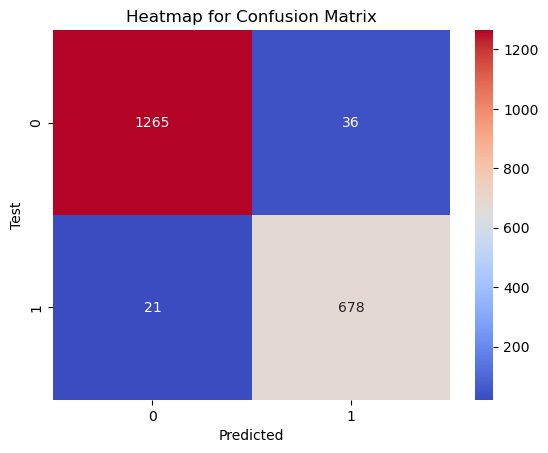

In [141]:
# Heatmap for Confusion Matrix
seaborn.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='G', cmap='coolwarm' )
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Heatmap for Confusion Matrix')


In [142]:
#  (Course Materials, n.d.)
#  Model Complexity Curve
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [143]:
#  Loop k, classifier fit with training data, find accuracy of both training and test data
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
print("Training Accuracy:", train_accuracy[i], "\nTest Accuracy:", test_accuracy[i])

Training Accuracy: 0.9815 
Test Accuracy: 0.972


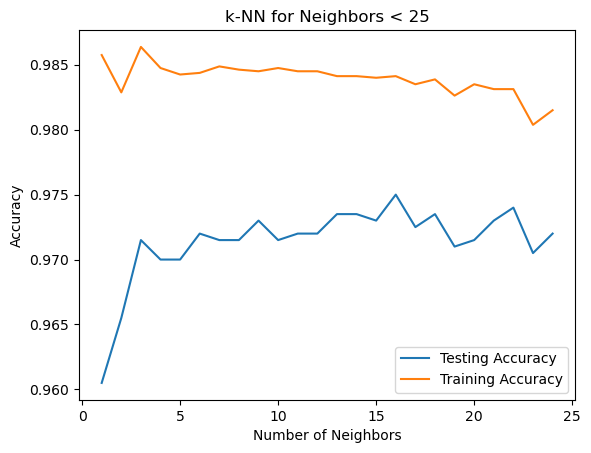

In [144]:
# Visualization
plt.title('k-NN for Neighbors < 25')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [145]:
# (How to plot ROC curve in Python, 2024) 

In [146]:
auc_roc = roc_auc_score(y_test, y_predicted_probability)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.9947041947483999


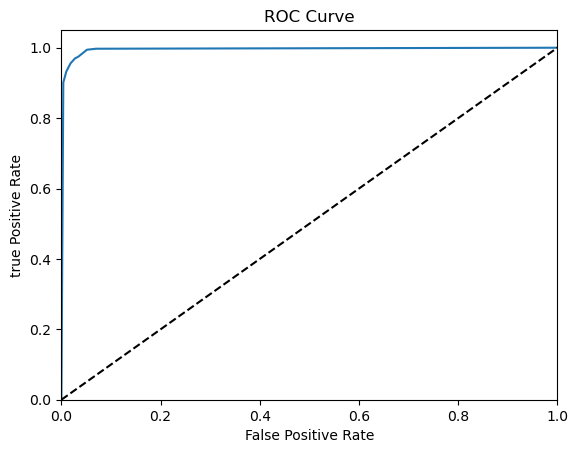

In [147]:
# Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probability)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive Rate')
plt.title('ROC Curve')
plt.show()
